In [1]:
#list .csv files
import os
for file in os.listdir():
    if "csv" in file:
        print(file)

100mesh.csv


In [2]:
# load data
data_file = "100mesh.csv"
import pandas as pd
mesh = pd.read_csv(data_file)
display(mesh.head())

,intensity,two_theta_deg,theta_deg,theta_rad,sintheta,two_sin_theta,d-spacing,sin_squared_theta
0,5.0,30.00,15.000,0.261799,0.258819,0.517638,2.975052,0.066987
1,5.1,32.50,16.250,0.283616,0.279829,0.559658,2.751680,0.078304
2,5.2,29.25,14.625,0.255254,0.252492,0.504983,3.049607,0.063752
3,5.3,33.75,16.875,0.294524,0.290285,0.580569,2.652569,0.084265
4,5.4,35.75,17.875,0.311978,0.306941,0.613883,2.508622,0.094213


In [3]:
# min/max charasteristics for columns
for column in mesh.columns:
    print(f"{column} : min = {mesh[column].min()}, max = {mesh[column].max()}")
print(f"\nindex = {mesh.index}")

intensity : min = 5.0, max = 100.0
two_theta_deg : min = 1.0, max = 312.75
theta_deg : min = 0.5, max = 156.375
theta_rad : min = 0.008726646, max = 2.7292586180000002
sintheta : min = 0.008726535, max = 0.96869158
two_sin_theta : min = 0.017453071, max = 1.9373831609999999
d-spacing : min = 0.794886645, max = 88.23662038
sin_squared_theta : min = 7.62e-05, max = 0.9383633779999999

index = RangeIndex(start=0, stop=951, step=1)


In [4]:
#dataset structure
display(mesh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 8 columns):
intensity            951 non-null float64
two_theta_deg        951 non-null float64
theta_deg            951 non-null float64
theta_rad            951 non-null float64
sintheta             951 non-null float64
two_sin_theta        951 non-null float64
d-spacing            951 non-null float64
sin_squared_theta    951 non-null float64
dtypes: float64(8)
memory usage: 59.5 KB


None

In [5]:
# columns correlation
mesh.corr()

,intensity,two_theta_deg,theta_deg,theta_rad,sintheta,two_sin_theta,d-spacing,sin_squared_theta
intensity,1.000000,-0.216360,-0.216360,-0.216360,-0.280482,-0.280482,0.496481,-0.127535
two_theta_deg,-0.216360,1.000000,1.000000,1.000000,0.861654,0.861654,-0.421072,0.825311
theta_deg,-0.216360,1.000000,1.000000,1.000000,0.861654,0.861654,-0.421072,0.825311
theta_rad,-0.216360,1.000000,1.000000,1.000000,0.861654,0.861654,-0.421072,0.825311
sintheta,-0.280482,0.861654,0.861654,0.861654,1.000000,1.000000,-0.537137,0.920878
two_sin_theta,-0.280482,0.861654,0.861654,0.861654,1.000000,1.000000,-0.537137,0.920878
d-spacing,0.496481,-0.421072,-0.421072,-0.421072,-0.537137,-0.537137,1.000000,-0.309319
sin_squared_theta,-0.127535,0.825311,0.825311,0.825311,0.920878,0.920878,-0.309319,1.000000


In [6]:
#find huge correlations within data (>0.8)
corr_series=mesh.corr().abs().unstack().drop_duplicates().sort_values(ascending = False)

corr_series[(corr_series<1.0)&(corr_series>0.8)]

sintheta       two_sin_theta        1.000000
two_theta_deg  theta_rad            1.000000
sintheta       sin_squared_theta    0.920878
two_sin_theta  sin_squared_theta    0.920878
two_theta_deg  sintheta             0.861654
theta_rad      sintheta             0.861654
two_theta_deg  two_sin_theta        0.861654
theta_rad      two_sin_theta        0.861654
               sin_squared_theta    0.825311
two_theta_deg  sin_squared_theta    0.825311
dtype: float64

In [7]:
mesh = mesh.drop(['two_sin_theta','two_theta_deg','sin_squared_theta','theta_rad','sintheta'],axis=1)
mesh.head()

,intensity,theta_deg,d-spacing
0,5.0,15.000,2.975052
1,5.1,16.250,2.751680
2,5.2,14.625,3.049607
3,5.3,16.875,2.652569
4,5.4,17.875,2.508622


In [8]:
#check correlations
display(mesh.corr())

,intensity,theta_deg,d-spacing
intensity,1.000000,-0.216360,0.496481
theta_deg,-0.216360,1.000000,-0.421072
d-spacing,0.496481,-0.421072,1.000000


In [9]:
# min/max charasteristics for columns
for column in mesh.columns:
    print(f"{column} : min = {mesh[column].min()}, max = {mesh[column].max()}")
print(f"\nindex = {mesh.index}")

intensity : min = 5.0, max = 100.0
theta_deg : min = 0.5, max = 156.375
d-spacing : min = 0.794886645, max = 88.23662038

index = RangeIndex(start=0, stop=951, step=1)


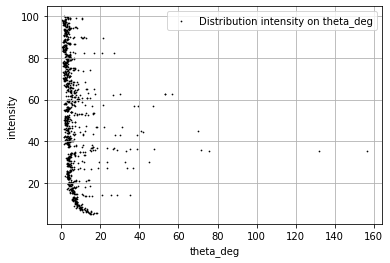

In [10]:
#Distribution intensity on theta_deg
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x = mesh['theta_deg'],y = mesh['intensity'], label = 'Distribution intensity on theta_deg', c  = 'black', s = 0.5)
plt.xlabel('theta_deg')
plt.ylabel('intensity')
plt.legend(loc='upper right')
plt.grid()
plt.show()

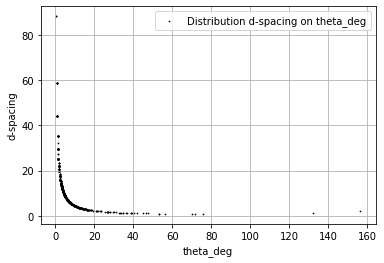

In [11]:
#Distribution d-spacing on theta_deg
plt.scatter(x = mesh['theta_deg'],y = mesh['d-spacing'], label = 'Distribution d-spacing on theta_deg', c  = 'black', s = 0.5)
plt.xlabel('theta_deg')
plt.ylabel('d-spacing')
plt.legend(loc='upper right')
plt.grid()
plt.show()

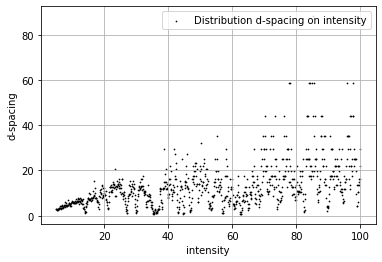

In [12]:
#Distribution d-spacing on theta_deg
plt.scatter(x = mesh['intensity'],y = mesh['d-spacing'], label = 'Distribution d-spacing on intensity', c  = 'black', s = 0.5)
plt.xlabel('intensity')
plt.ylabel('d-spacing')
plt.legend(loc='upper right')
plt.grid()
plt.show()

intensity has unifor distribution.
intensity : min = 5.0, max = 100.0


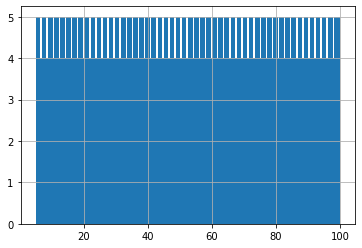

In [13]:
#histograms
column = 'intensity'
print(f"{column} has unifor distribution.")
print(f"{column} : min = {mesh[column].min()}, max = {mesh[column].max()}")
mesh[column] .hist(bins = 200)

d-spacing has * distribution.
d-spacing : min = 0.794886645, max = 88.23662038


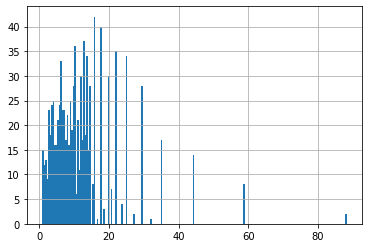

In [14]:
#histograms
column = 'd-spacing'
print(f"{column} has * distribution.")
print(f"{column} : min = {mesh[column].min()}, max = {mesh[column].max()}")
mesh[column] .hist(bins = 200)

theta_deg has * distribution.
theta_deg : min = 0.5, max = 156.375


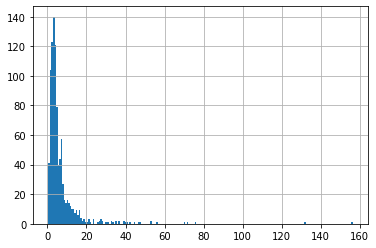

In [15]:
#histograms
column = 'theta_deg'
print(f"{column} has * distribution.")
print(f"{column} : min = {mesh[column].min()}, max = {mesh[column].max()}")
mesh[column] .hist(bins = 200)